<font size = "5"> **Chapter 1:  [Introduction](Ch1-Introduction.ipynb)** </font>


<hr style="height:1px;border-top:4px solid #FF8200" />

# Load a File
part of 

<font size = "5"> **[pyTEMlib](https://github.com/pycroscopy/pyTEMlib)**</font>

a 
<font size = "3"> **[pycroscopy library](https://github.com/pycroscopy)**</font>

by Gerd Duscher, 2021

Microscopy Facilities<br>
Joint Institute of Advanced Materials<br>
The University of Tennessee, Knoxville

Model based analysis and quantification of data acquired with transmission electron microscopes

In [2]:
import sys

from pkg_resources import get_distribution, DistributionNotFound

def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = (get_distribution(package_name).version)
    except (DistributionNotFound, ImportError) as err:
        version = '-1'
    return version


# pyTEMlib setup ------------------
if test_package('pyTEMlib') < '0.2023.5.0':
    print('installing pyTEMlib')
    !{sys.executable} -m pip install git+https://github.com/pycroscopy/SciFiReaders.git@main -q
    !{sys.executable} -m pip install git+https://github.com/pycroscopy/pyTEMlib.git@use_dict_2 -q
    
# ------------------------------
print('done')

installing pyTEMlib
done


In [28]:
!{sys.executable} -m pip install git+https://github.com/pycroscopy/sidpy.git@rama_dev

  Cloning https://github.com/pycroscopy/sidpy.git (to revision rama_dev) to c:\users\gduscher\appdata\local\temp\pip-req-build-1w9tda9s
  Resolved https://github.com/pycroscopy/sidpy.git to commit 82747d433d630407036b03a7bc733abff88e5ddd
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/pycroscopy/sidpy.git 'C:\Users\gduscher\AppData\Local\Temp\pip-req-build-1w9tda9s'
  Running command git checkout -b rama_dev --track origin/rama_dev
  branch 'rama_dev' set up to track 'origin/rama_dev'.
  Switched to a new branch 'rama_dev'


## Content

Short test to verify that files can be loaded.

This notebook uses an ipywidget to select a file.

[![Load File](http://img.youtube.com/vi/HLax9kDkrAg/0.jpg)](http://www.youtube.com/watch?v=HLax9kDkrAg "Load TEM file")

## First we import the relevant packages

In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pylab as plt 
import sys

if 'google.colab' in sys.modules:
    from google.colab import output
    output.enable_custom_widget_manager()
    from google.colab import drive
else:
    %gui qt5

%load_ext autoreload
%autoreload 2

sys.path.insert(0, '../../pyTEMlib')
import pyTEMlib
from pyTEMlib import file_tools     # File input/ output library


# For archiving reasons it is a good idea to print the version numbers out at this point
print('pyTEMlib version: ', pyTEMlib.__version__)
    
__notebook__ = 'analyze_core_loss'
__notebook_version__ = '2023_05_20'


You don't have igor2 installed.     If you wish to open igor files, you will need to install it     (pip install igor2) before attempting.
You don't have gwyfile installed.     If you wish to open .gwy files, you will need to      install it (pip install gwyfile) before attempting.
Symmetry functions of spglib enabled
pyTEMlib version:  0.2023.5.1


## Load and plot any file

First a dialog to select a widget will apear.

Go to the relevant path and select a file (nion-file names will be translated).

Then the data of the file will be plotted.

In [18]:
### Open file widget
fileWidget = file_tools.FileWidget()

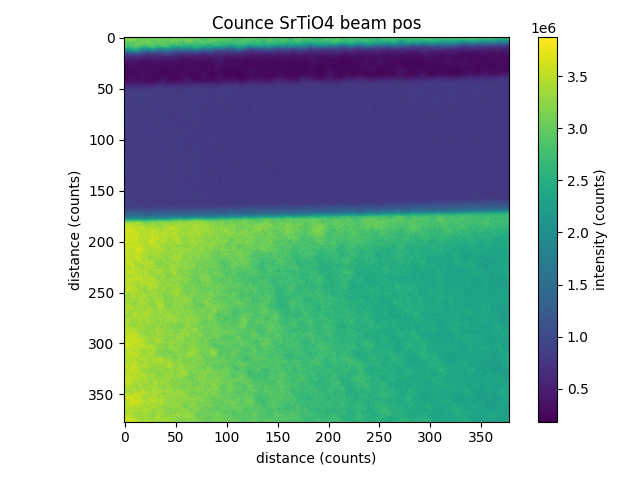

In [34]:
view = fileWidget.dataset.plot()

In [14]:
print(dataset)
plt.figure()
plt.imshow(dataset)

sidpy.Dataset of type IMAGE with:
 dask.array<generic, shape=(1024, 1024), dtype=float32, chunksize=(1024, 1024), chunktype=numpy.ndarray>
 data contains: intensity (counts)
 and Dimensions: 
y:  distance (nm) of size (1024,)
x:  distance (nm) of size (1024,)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [9]:
dataset.z.dimension_type = 'temporal'
dataset.plot()

AttributeError: 'Dataset' object has no attribute 'z'

In [17]:
dataset.h5_dataset.file.close()